#Importing

In [1]:
# load some default Python modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

#Import Data (Training) and Explore

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv("/content/drive/My Drive/CMPE 258/Homework/HW5/temp.csv", nrows = 5_000_000)
print("shape of train data", train.shape)
train = train.drop(train.columns[0], axis=1)

train.head()

shape of train data (100000, 9)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2012-10-06 20:31:36.0000003,5.5,2012-10-06 20:31:36 UTC,-73.952825,40.772048,-73.952194,40.781152,3
1,2010-07-12 09:44:33.0000001,4.9,2010-07-12 09:44:33 UTC,-73.983249,40.734655,-73.991278,40.738918,1
2,2010-05-07 20:05:00.000000228,14.9,2010-05-07 20:05:00 UTC,-73.968212,40.762212,-73.919958,40.755087,2
3,2010-05-31 18:05:00.00000060,6.9,2010-05-31 18:05:00 UTC,-73.991633,40.750440,-73.985928,40.736168,3
4,2011-11-03 17:35:00.00000095,7.7,2011-11-03 17:35:00 UTC,-73.978593,40.753452,-73.978652,40.762660,1


In [4]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
# Basic Stats of the data set
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.372719,-72.507473,39.903852,-72.521524,39.932607,1.689950
std,10.027061,12.177309,6.636862,11.823943,6.800431,1.463284
min,-45.000000,-2027.098998,-760.342012,-1690.169260,-74.013342,0.000000
25%,6.000000,-73.992188,40.734828,-73.991399,40.733876,1.000000
50%,8.500000,-73.981888,40.752422,-73.980155,40.753020,1.000000
75%,12.500000,-73.967307,40.766985,-73.963680,40.767938,2.000000
max,658.890000,40.804750,44.246020,40.871847,826.502450,208.000000


In [6]:
print("old size: %d" % len(train))
train = train[train.fare_amount >=0]
print("New size: %d" % len(train))

old size: 100000
New size: 99996


In [7]:
# check missing data
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
print("old size: %d" % len(train))
train = train.dropna(how='any', axis=0)
print("New size after dropping missing value: %d" % len(train))

old size: 99996
New size after dropping missing value: 99996


Text(0, 0.5, 'Frequency')

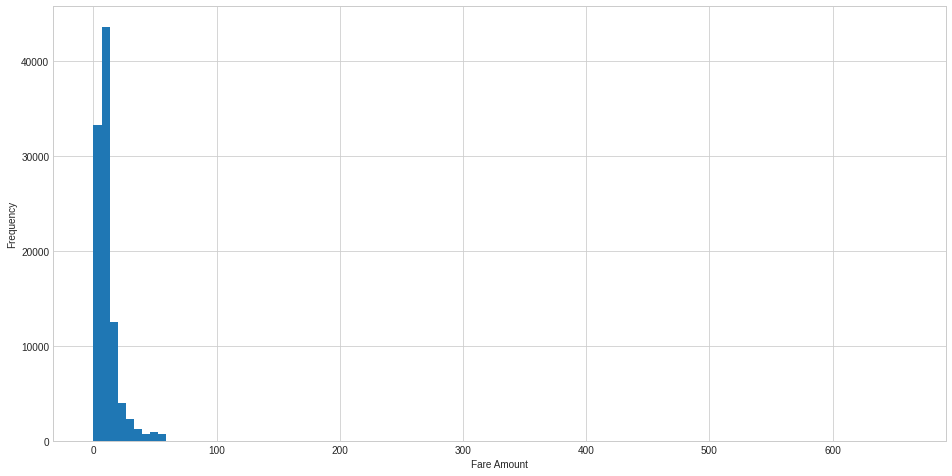

In [9]:
# Lets see the distribution of fare amount 
train.fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

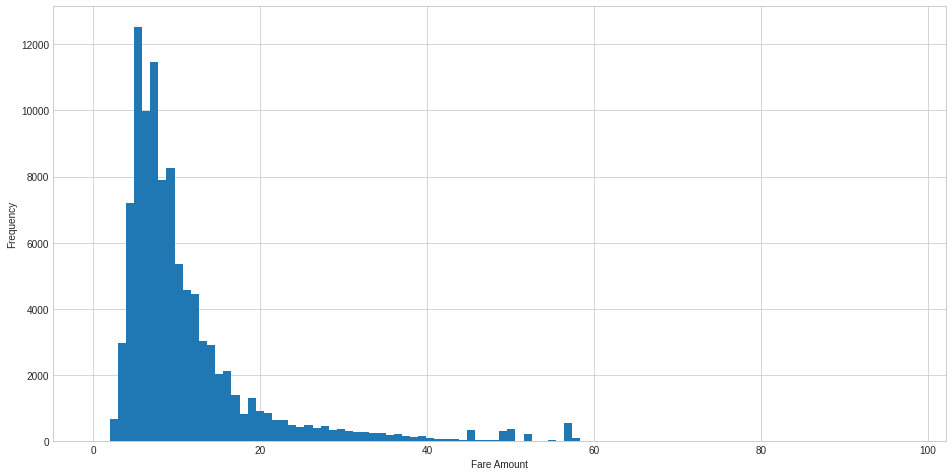

In [10]:
# Lets see the distribution of fare amount less than 100
train[train.fare_amount <100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [11]:
train[train.fare_amount >100 ].shape

(40, 8)

Text(0, 0.5, 'Frequency')

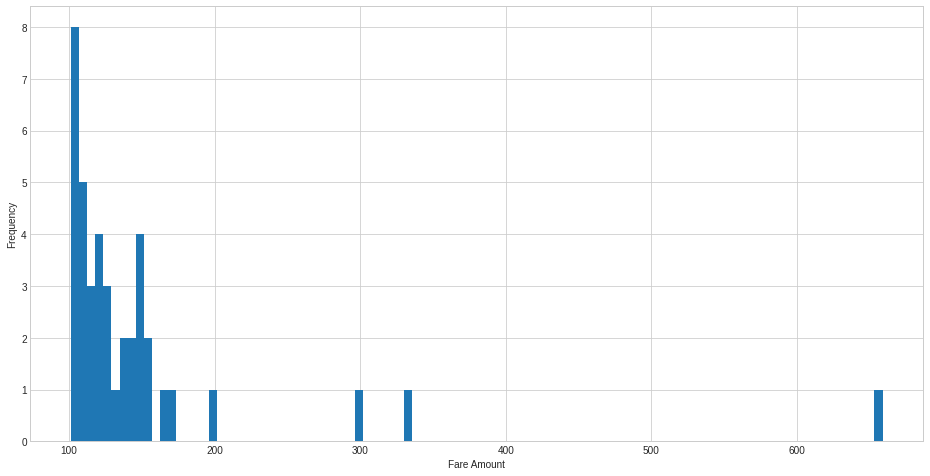

In [12]:
# Lets see the distribution of fare amount more than 100
train[train.fare_amount >100 ].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

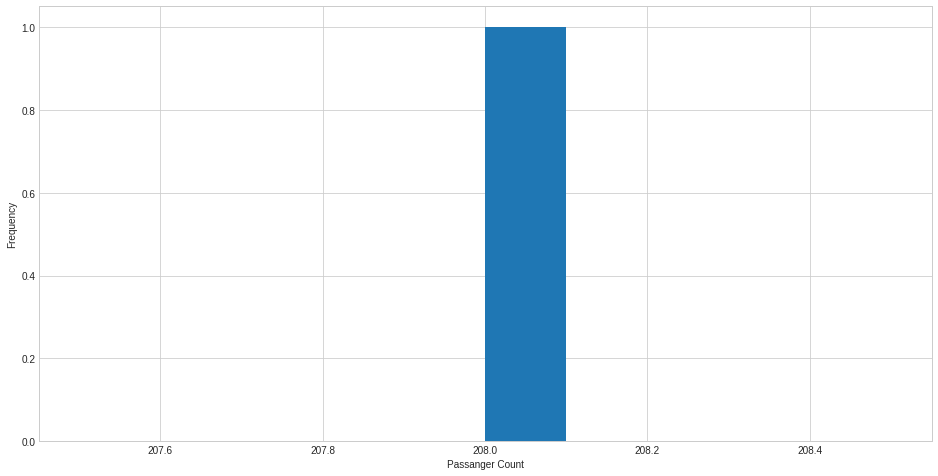

In [13]:
# checking for passanger count greater than 7
train[train.passenger_count >7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

In [14]:
# data for passanger count greater than 7
train[train.passenger_count >7]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
3840,2010-12-16 11:21:00.000000209,3.3,2010-12-16 11:21:00 UTC,0.0,0.0,0.0,0.0,208


Text(0, 0.5, 'Frequency')

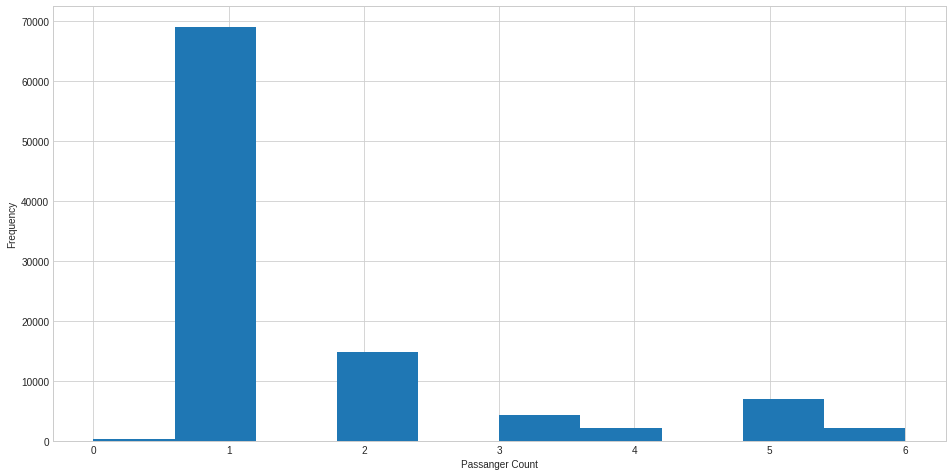

In [15]:
# checking for passanger count less than 7
train[train.passenger_count <7].passenger_count.hist(bins=10, figsize = (16,8))
plt.xlabel("Passanger Count")
plt.ylabel("Frequency")

In [16]:
# checking for records where passanger count is 0
train[train.passenger_count ==0].shape

(322, 8)

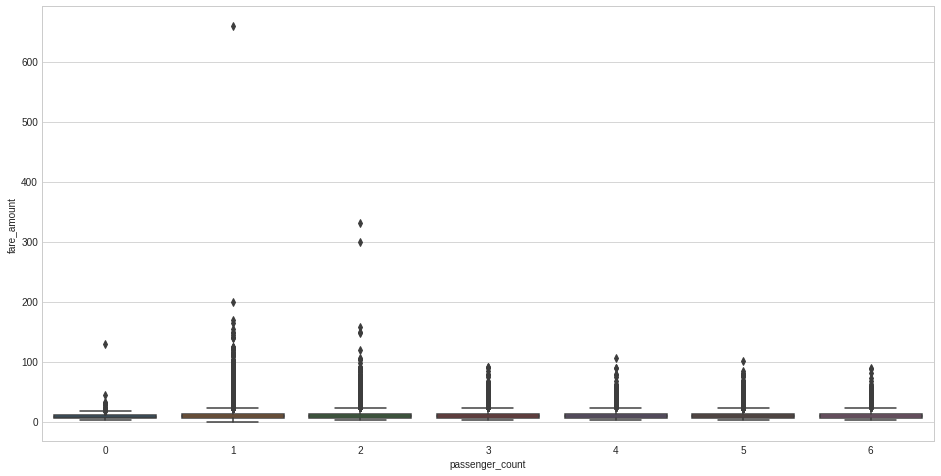

In [17]:
plt.figure(figsize= (16,8))
sns.boxplot(x = train[train.passenger_count< 7].passenger_count, y = train.fare_amount)

In [18]:
train[train.passenger_count <7][['fare_amount','passenger_count']].corr()

,fare_amount,passenger_count
fare_amount,1.000000,0.007724
passenger_count,0.007724,1.000000


#Import and explore Test Data

In [19]:
test = pd.read_csv("/content/drive/My Drive/CMPE 258/Homework/HW5/test.csv")
print("shape of test data", test.shape)
test.head()

shape of test data (9914, 7)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [20]:
#check for missing value
test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [21]:
# checking for basic stats
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [22]:
min(test.pickup_longitude.min(),test.dropoff_longitude.min()), \
max(test.pickup_longitude.max(),test.dropoff_longitude.max())

(-74.263242, -72.986532)

In [23]:
min(test.pickup_latitude.min(),test.dropoff_latitude.min()), \
max(test.pickup_latitude.max(),test.dropoff_latitude.max())

(40.568973, 41.709555)

In [24]:
# this function will also be used with the test set below
def select_within_test_boundary(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [25]:
BB = (-74.5, -72.8, 40.5, 41.8)
print('Old size: %d' % len(train))
train = train[select_within_test_boundary(train, BB)]
print('New size: %d' % len(train))

Old size: 99996
New size: 97876


#Feature Engineering

In [26]:
def prepare_time_features(df):
    df['pickup_datetime'] = df['pickup_datetime'].str.slice(0, 16)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    df['hour_of_day'] = df.pickup_datetime.dt.hour
#     df['week'] = df.pickup_datetime.dt.week
    df['month'] = df.pickup_datetime.dt.month
    df["year"] = df.pickup_datetime.dt.year
#     df['day_of_year'] = df.pickup_datetime.dt.dayofyear
#     df['week_of_year'] = df.pickup_datetime.dt.weekofyear
    df["weekday"] = df.pickup_datetime.dt.weekday
#     df["quarter"] = df.pickup_datetime.dt.quarter
#     df["day_of_month"] = df.pickup_datetime.dt.day
    
    return df

In [27]:
train = prepare_time_features(train)
test = prepare_time_features(test)

In [28]:
# calculate-distance-between-two-latitude-longitude-points-haversine-formula 
# Returns distance in miles
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))   # 2*R*asin...

In [29]:
train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)



In [30]:
test['distance_miles'] = distance(test.pickup_latitude, test.pickup_longitude, \
                                      test.dropoff_latitude, test.dropoff_longitude)

In [31]:
def transform(data):
    # Distances to nearby airports, 
    jfk = (-73.7781, 40.6413)
    ewr = (-74.1745, 40.6895)
    lgr = (-73.8740, 40.7769)

    data['pickup_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                         data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_jfk'] = distance(jfk[1], jfk[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_ewr'] = distance(ewr[1], ewr[0], 
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_ewr'] = distance(ewr[1], ewr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    data['pickup_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                          data['pickup_latitude'], data['pickup_longitude'])
    data['dropoff_distance_to_lgr'] = distance(lgr[1], lgr[0],
                                           data['dropoff_latitude'], data['dropoff_longitude'])
    
    return data

train = transform(train)
test = transform(test)

In [32]:
train[(train['distance_miles']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr
17684,2010-02-10 19:28:00.00000031,0.0,2010-02-10 19:28:00+00:00,-73.967097,40.686223,-73.967097,40.686223,1,19,2,2010,2,0.0,10.380344,10.380344,10.868524,10.868524,7.937958,7.937958


In [33]:
print("old size: %d" % len(train))
train = train.drop(index= train[(train['distance_miles']==0)&(train['fare_amount']==0)].index, axis=0)
print("New size: %d" % len(train))

old size: 97876
New size: 97875


In [34]:
train[train['fare_amount']==0].shape

(1, 19)

In [35]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount']==0].index, axis=0)
print("New size: %d" % len(train))

old size: 97875
New size: 97874


In [36]:
train[train['fare_amount'] < 2.5].shape

(5, 19)

In [37]:
print("old size: %d" % len(train))
train = train.drop(index= train[train['fare_amount'] < 2.5].index, axis=0)
print("New size: %d" % len(train))

old size: 97874
New size: 97869


In [38]:
train[train.passenger_count >= 7]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour_of_day,month,year,weekday,distance_miles,pickup_distance_to_jfk,dropoff_distance_to_jfk,pickup_distance_to_ewr,dropoff_distance_to_ewr,pickup_distance_to_lgr,dropoff_distance_to_lgr


In [39]:
print("old size: %d" % len(train))
train = train.drop(index= train[train.passenger_count >= 7].index, axis=0)
print("New size: %d" % len(train))

old size: 97869
New size: 97869


In [40]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
fare_amount,97869.0,11.342194,9.673738,2.500000,6.000000,8.500000,12.500000,331.290000
pickup_longitude,97869.0,-73.975329,0.038431,-74.479285,-73.992391,-73.982155,-73.968535,-73.137393
pickup_latitude,97869.0,40.750976,0.029597,40.530403,40.736439,40.753104,40.767422,41.366138
dropoff_longitude,97869.0,-73.974305,0.037968,-74.475383,-73.991587,-73.980608,-73.965353,-73.137393
dropoff_latitude,97869.0,40.751235,0.033003,40.524522,40.735406,40.753754,40.768307,41.366138
passenger_count,97869.0,1.687899,1.309807,0.000000,1.000000,1.000000,2.000000,6.000000
hour_of_day,97869.0,13.548836,6.506535,0.000000,9.000000,14.000000,19.000000,23.000000
month,97869.0,6.273437,3.442157,1.000000,3.000000,6.000000,9.000000,12.000000
year,97869.0,2011.742319,1.860078,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000
weekday,97869.0,3.040043,1.947050,0.000000,1.000000,3.000000,5.000000,6.000000


In [41]:
pd.cut(train['distance_miles'],np.linspace(0, 70, num = 8)).value_counts()

(0.0, 10.0]     94725
(10.0, 20.0]     2076
(20.0, 30.0]       14
(60.0, 70.0]        7
(50.0, 60.0]        6
(40.0, 50.0]        1
(30.0, 40.0]        0
Name: distance_miles, dtype: int64

In [42]:
pd.cut(test['distance_miles'],np.linspace(0, 70, num = 8)).value_counts()

(0.0, 10.0]     9611
(10.0, 20.0]     214
(60.0, 70.0]       3
(20.0, 30.0]       1
(50.0, 60.0]       0
(40.0, 50.0]       0
(30.0, 40.0]       0
Name: distance_miles, dtype: int64

In [43]:
# we will deal with it later 
fare_100 = train[train.fare_amount > 100]
fare_100.shape

(31, 19)

In [44]:
fare_100[fare_100.distance_miles <1].shape

(15, 19)

In [45]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour_of_day', 'month', 'year', 'weekday',
       'distance_miles', 'pickup_distance_to_jfk', 'dropoff_distance_to_jfk',
       'pickup_distance_to_ewr', 'dropoff_distance_to_ewr',
       'pickup_distance_to_lgr', 'dropoff_distance_to_lgr'],
      dtype='object')

In [46]:
# create copy of the data set
df_train = train.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
df_test = test.drop(columns= ['key','pickup_datetime'], axis= 1).copy()
print(df_train.shape)
print(df_test.shape)

(97869, 17)
(9914, 16)


#Train Test Split

In [47]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('fare_amount', axis=1),
                                                    df_train['fare_amount'], test_size=0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(78295, 16)
(19574, 16)
(78295,)
(19574,)


#XGBoost Model

In [48]:
import xgboost as xgb


In [49]:
params = {
   
    'max_depth': 7,
    'gamma' :0,
    'eta':.03, 
    'subsample': 1,
    'colsample_bytree': 0.9, 
    'objective':'reg:linear',
    'eval_metric':'rmse',
    'silent': 0
}

In [50]:
def XGBmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = xgb.DMatrix(X_train,label=y_train)
    matrix_test = xgb.DMatrix(X_test,label=y_test)
    model=xgb.train(params=params,
                    dtrain=matrix_train,num_boost_round=5000, 
                    early_stopping_rounds=10,evals=[(matrix_test,'test')])
    return model

model = XGBmodel(X_train,X_test,y_train,y_test,params)

[15:30:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:14.1559
Will train until test-rmse hasn't improved in 10 rounds.
[1]	test-rmse:13.7765
[2]	test-rmse:13.4296
[3]	test-rmse:13.0724
[4]	test-rmse:12.7282
[5]	test-rmse:12.3956
[6]	test-rmse:12.0719
[7]	test-rmse:11.7602
[8]	test-rmse:11.4581
[9]	test-rmse:11.1648
[10]	test-rmse:10.8995
[11]	test-rmse:10.6285
[12]	test-rmse:10.3662
[13]	test-rmse:10.1128
[14]	test-rmse:9.86923
[15]	test-rmse:9.632
[16]	test-rmse:9.40338
[17]	test-rmse:9.18332
[18]	test-rmse:8.9753
[19]	test-rmse:8.77181
[20]	test-rmse:8.57501
[21]	test-rmse:8.38662
[22]	test-rmse:8.21539
[23]	test-rmse:8.03949
[24]	test-rmse:7.86964
[25]	test-rmse:7.70939
[26]	test-rmse:7.5515
[27]	test-rmse:7.39911
[28]	test-rmse:7.25152
[29]	test-rmse:7.11256
[30]	test-rmse:6.97939
[31]	test-rmse:6.84958
[32]	test-rmse:6.72705
[33]	test-rmse:6.60947
[34]	test-rmse:6.49431
[35]	test-rmse:6.38956
[3

#Eval/Predictions

In [51]:
prediction = model.predict(xgb.DMatrix(df_test), ntree_limit = model.best_ntree_limit).tolist()

In [52]:
test = pd.read_csv("/content/drive/My Drive/CMPE 258/Homework/HW5/test.csv")
holdout = pd.DataFrame({'key': test['key'], 'fare_amount': prediction})
holdout.to_csv('xgb_4m_utc_with_cleaning.csv', index=False)

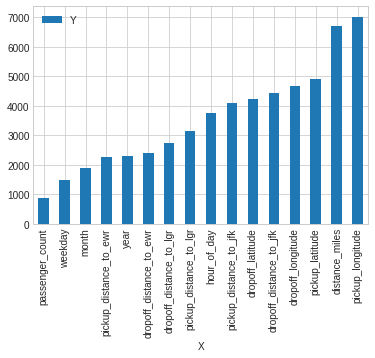

In [53]:
import matplotlib.pyplot as plt
fscores = pd.DataFrame({'X': list(model.get_fscore().keys()), 'Y': list(model.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')